In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [2]:
project_dir="results/projects/240117llama7b_10"
#project_dir="results/projects/240118llama7b_100"
#project_dir="results/projects/240117llama7b"
project_dir="results/projects/240119mixtral_self_reasoning_10/"


In [3]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [4]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,3885.587074,45.567021,0.536550,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",2,test,93
1,3461.712687,39.631250,0.720715,0.952381,"[{'name': 'Dextromoramide', 'smiles': 'O=C(N1C...",1,train,67
2,8133.503250,66.285000,0.479000,1.000000,"[{'name': 'cyclobutane, methylene-', 'smiles':...",0,train,32
3,3160.188564,41.556383,0.623071,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",3,test,93
4,3242.402653,40.640816,0.770054,0.980000,[{'name': '(3-nitrophenyl)[(5E)-4-phenyl-5-(ph...,3,train,93
5,4316.385450,46.519000,0.480541,1.000000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",1,test,67
6,4610.301719,46.484375,0.427270,0.960000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",0,test,32
7,4077.089388,39.538776,0.684824,0.980000,"[{'name': '1-ethylpiperazine-2,3-dione', 'smil...",2,train,93


<Axes: xlabel='generation', ylabel='MSE'>

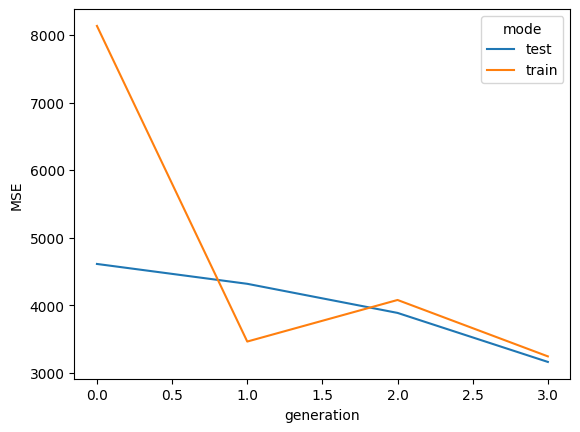

In [5]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

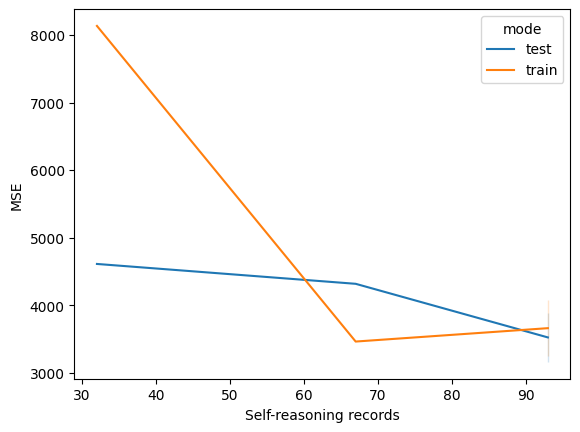

In [6]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)